# Базовый пайплайн для соревнования по определению контрафакта 

### 1. Загрузка данных

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings

df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")
print(f"Target distribution in train:")
print(df_train['resolution'].value_counts())
print()

Train shape: (197198, 44)
Test shape: (22760, 43)
Target distribution in train:
resolution
0    184146
1     13052
Name: count, dtype: int64



In [17]:
len(df_train["brand_name"].unique())

4067

In [9]:
df_train.head()

,resolution,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,...,ExemplarReturnedCountTotal30,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID
id,,,,,,,,,,,,,,,,,,,,,
159385,0,ACTRUM,"Мешки пылесборники для пылесоса PHILIPS, 10 шт...","Мешки для пылесоса PHILIPS TRIATLON, синтетиче...",Пылесборник,6.0,4.0,4.0,3.0,32.0,...,11.0,50.0,730.171845,896.528847,1043.118191,1.0,1.0,1860.0,78312,1218
288616,0,Red Line,Защитная силиконовая крышка обьектива GoPro He...,Защитная крышка Redline на экшн-камеру GoPro (...,Крышка для объектива,NaN,NaN,NaN,NaN,NaN,...,26.0,54.0,993.043882,1137.421611,1188.608000,1.0,1.0,1757.0,141999,1374
108090,0,Talwar Brothers,Плоский медиатор из кости толщиной 0.6 мм<br/>...,Медиатор для гитары Acura GP-PB6,Аксессуар для музыкального инструмента,0.0,0.0,1.0,0.0,1.0,...,16.0,34.0,800.822138,1174.069505,1224.798286,1.0,1.0,1722.0,53306,1448
415607,0,NaN,"Игра Sonic Frontiers для PlayStation 5, русски...","Игра Sonic Frontiers для PlayStation 5, русски...",Видеоигра,NaN,NaN,NaN,NaN,NaN,...,3.0,6.0,0.000000,913.530121,982.789171,3.0,3.0,1692.0,202599,715
332391,0,NaN,Disney Classic Games: Aladdin and The Lion Kin...,"Игра Aladdin and Lion King (PlayStation 4, анг...",Видеоигра,1.0,0.0,0.0,0.0,0.0,...,3.0,6.0,0.000000,913.542170,982.783783,3.0,3.0,1692.0,163725,715


In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197198 entries, 159385 to 104566
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   resolution                    197198 non-null  int64  
 1   brand_name                    116667 non-null  object 
 2   description                   171138 non-null  object 
 3   name_rus                      197198 non-null  object 
 4   CommercialTypeName4           197198 non-null  object 
 5   rating_1_count                47193 non-null   float64
 6   rating_2_count                47193 non-null   float64
 7   rating_3_count                47193 non-null   float64
 8   rating_4_count                47193 non-null   float64
 9   rating_5_count                47193 non-null   float64
 10  comments_published_count      47193 non-null   float64
 11  photos_published_count        47193 non-null   float64
 12  videos_published_count        47193 non-null

In [104]:
df_train.describe()

,resolution,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,comments_published_count,photos_published_count,videos_published_count,PriceDiscounted,...,ExemplarReturnedCountTotal30,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID
count,197198.000000,47193.000000,47193.000000,47193.000000,47193.000000,47193.000000,47193.000000,47193.000000,47193.000000,197198.000000,...,189268.000000,189791.000000,187007.000000,189268.000000,189791.000000,196201.000000,196201.000000,197198.000000,197198.000000,197198.000000
mean,0.066187,2.048355,0.594876,1.109932,1.253067,13.446274,9.519505,4.412222,0.482699,758.971530,...,51.802196,147.169818,701.520465,905.735423,1025.111018,98.790485,98.732489,684.575827,110563.014001,1504.121553
std,0.248610,13.767362,3.398610,6.044903,6.175065,63.103940,46.637693,18.477008,3.595718,155.940582,...,164.435978,511.811000,413.671912,374.229445,360.664928,245.133031,245.151594,498.399100,63773.111390,2256.212708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,651.081516,...,3.000000,9.000000,611.486957,858.718884,968.864810,2.000000,2.000000,262.000000,55220.250000,157.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,736.695421,...,16.000000,45.000000,856.211201,1008.683523,1116.673313,7.000000,7.000000,607.000000,110732.500000,514.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,7.000000,4.000000,3.000000,0.000000,827.955170,...,52.000000,143.000000,990.670761,1131.163329,1229.895511,58.000000,58.000000,1058.000000,165852.750000,1723.000000
max,1.000000,1007.000000,199.000000,329.000000,518.000000,4465.000000,1753.000000,1035.000000,241.000000,1816.563093,...,55681.000000,181600.000000,1663.665513,1807.589625,1914.000284,1548.000000,1548.000000,2265.000000,220806.000000,12508.000000


In [105]:
df_train.describe(include='object')

,brand_name,description,name_rus,CommercialTypeName4
count,116667,171138,197198,197198
unique,4066,114781,154718,634
top,iQZiP,<p>Мы используем только НОВЫЕ комплектующие пр...,Power Bank 30000 мАч,Дисплеи для телефонов
freq,6084,3009,395,15002


<b> Анализ пропусков данных Светлые/белые области - Пропущенные значения
<b>
Темные област-= Присутствующие значения

Количество пропусков
 - resolution                           0
brand_name                       80531
description                      26060
name_rus                             0
CommercialTypeName4                  0
rating_1_count                  150005
rating_2_count                  150005
rating_3_count                  150005
rating_4_count                  150005
rating_5_count                  150005
comments_published_count        150005
photos_published_count          150005
videos_published_count          150005
PriceDiscounted                      0
item_time_alive                      0
item_count_fake_returns7             0
item_count_fake_returns30            0
item_count_fake_returns90            0
item_count_sales7                    0
item_count_sales30                   0
item_count_sales90                   0
item_count_returns7                  0
item_count_returns30                 0
item_count_returns90                 0
GmvTotal7                        10191
G

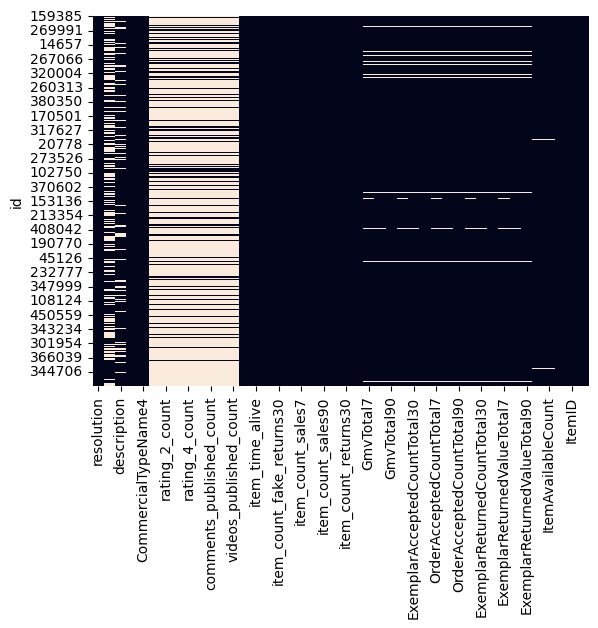

In [107]:
import seaborn as sns
sns.heatmap(df_train.isnull(), cbar=False)
print(f"Количество пропусков\n - {df_train.isnull().sum()}")


### 2. Предобработка данных
Используем 39 числовых признаков

In [ ]:
numeric_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [col for col in numeric_columns if col != 'resolution']

<b> Анализ выбросов в данных

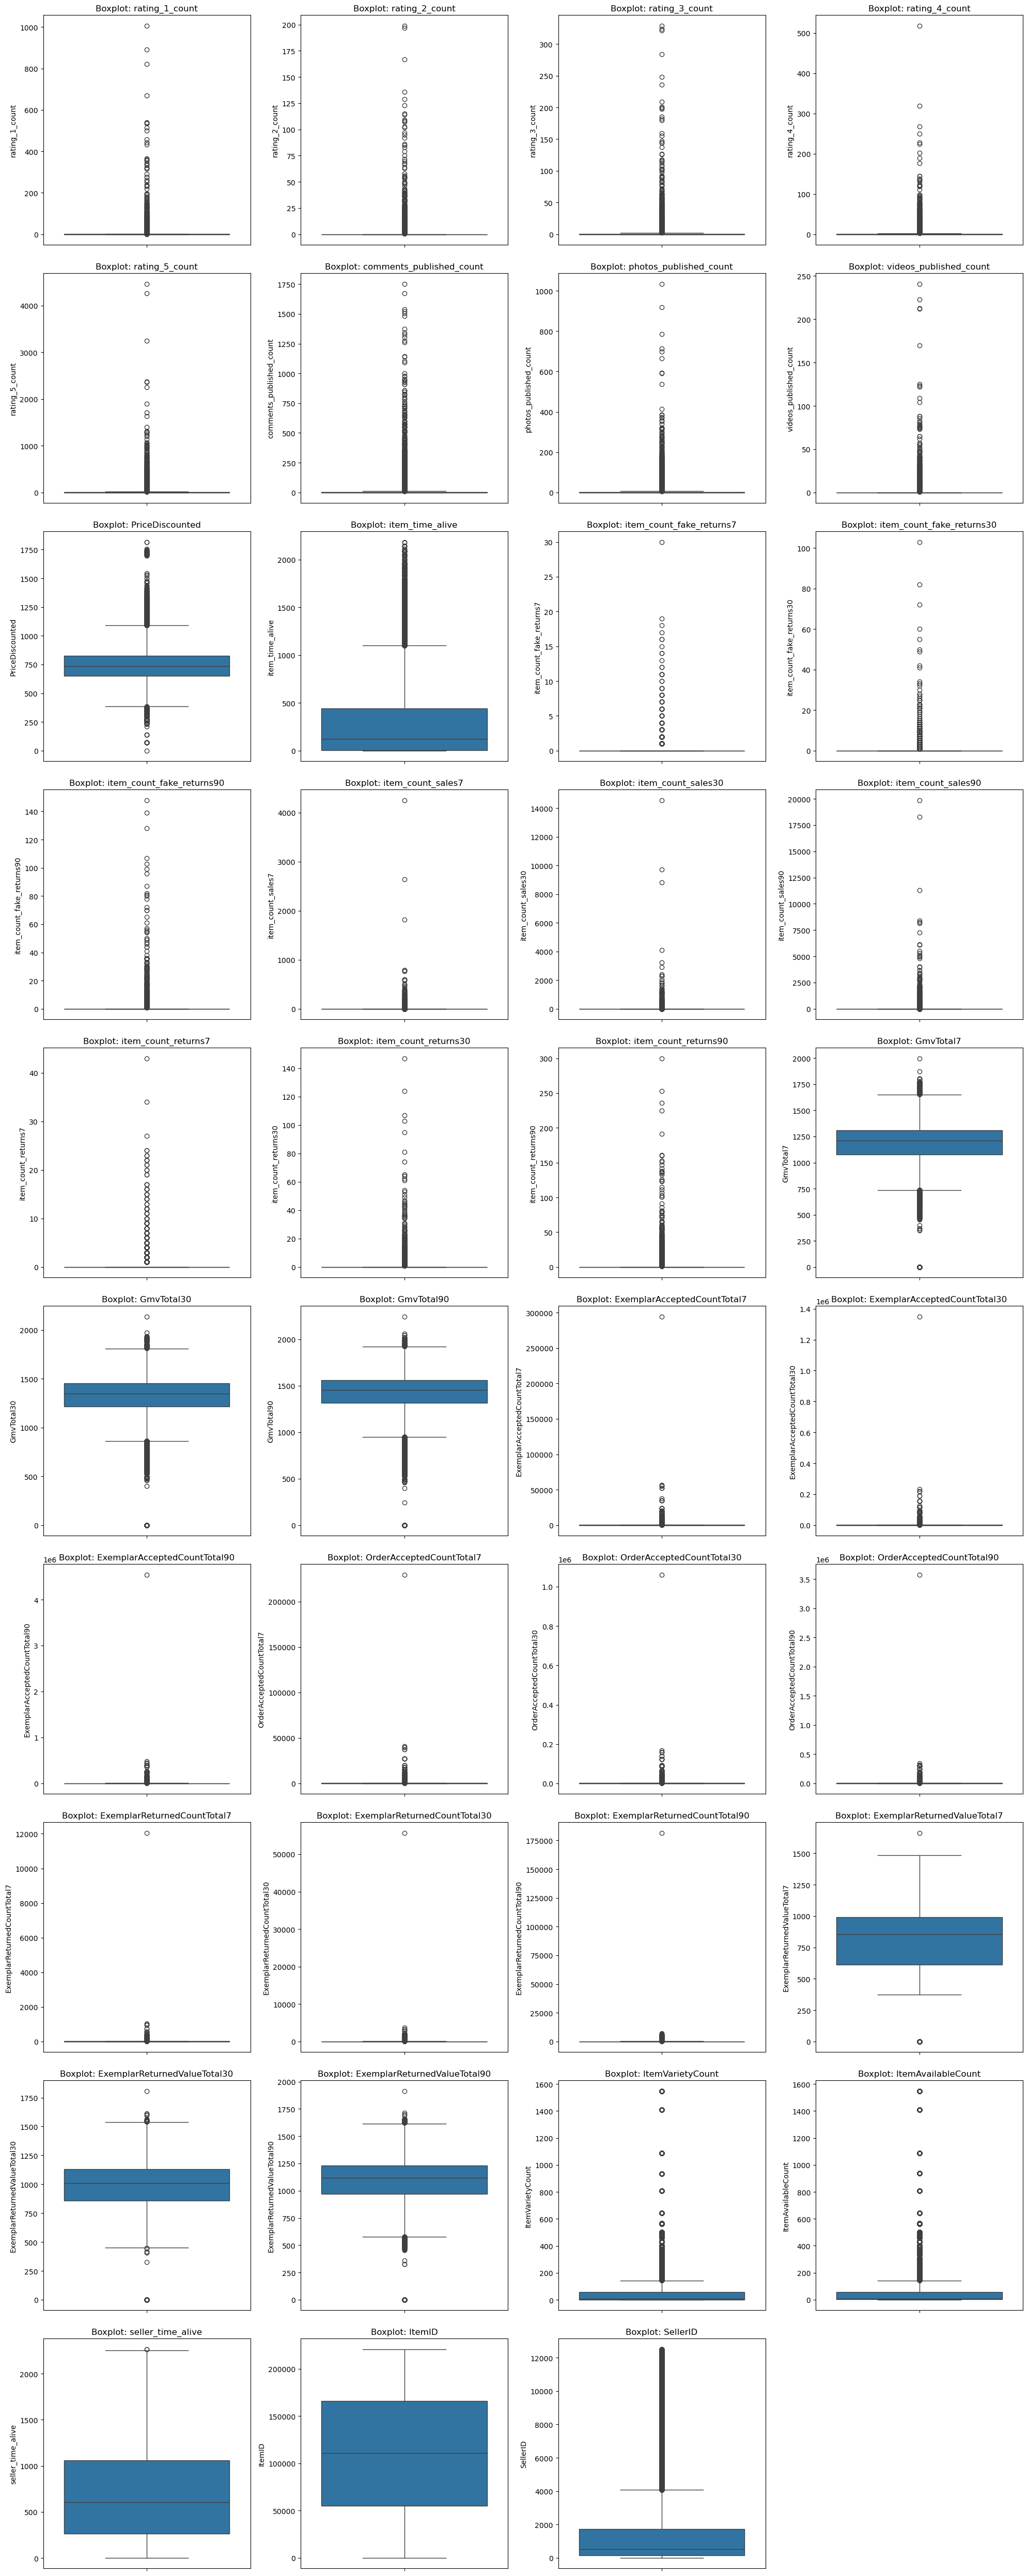

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_cols = 4  # Количество графиков в строке
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Вычисляем нужное количество строк

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Преобразуем матрицу осей в плоский список

# Строим boxplot для каждой числовой колонки
for i, col in enumerate(numeric_columns):
    if i < len(axes):
        sns.boxplot(y=df_train[col], ax=axes[i])
        axes[i].set_title(f'Boxplot: {col}')
        axes[i].set_xlabel('')  # Убираем подпись оси X

# Скрываем пустые subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [114]:
text_columns = df_train.select_dtypes(include=[np.object_]).columns.tolist()

In [116]:
df_train[text_columns]

,brand_name,description,name_rus,CommercialTypeName4
id,,,,
159385,ACTRUM,"Мешки пылесборники для пылесоса PHILIPS, 10 шт...","Мешки для пылесоса PHILIPS TRIATLON, синтетиче...",Пылесборник
288616,Red Line,Защитная силиконовая крышка обьектива GoPro He...,Защитная крышка Redline на экшн-камеру GoPro (...,Крышка для объектива
108090,Talwar Brothers,Плоский медиатор из кости толщиной 0.6 мм<br/>...,Медиатор для гитары Acura GP-PB6,Аксессуар для музыкального инструмента
415607,NaN,"Игра Sonic Frontiers для PlayStation 5, русски...","Игра Sonic Frontiers для PlayStation 5, русски...",Видеоигра
332391,NaN,Disney Classic Games: Aladdin and The Lion Kin...,"Игра Aladdin and Lion King (PlayStation 4, анг...",Видеоигра
...,...,...,...,...
159865,Tefal,Парогенератор Tefal Express Vision SV8152E0 об...,Парогенератор Tefal Express Vision SV8152E0 с ...,Паровая станция
299636,Dyson,Выпрямитель для волос Dyson Airstrait<br/><br/...,Выпрямитель Dyson Airstrait HT01 Nickel / Сopper,Выпрямитель для волос Dyson
24145,Weissgauff,Настольная компактная посудомоечная машина Wei...,Weissgauff Посудомоечная машина настольная ком...,Посудомоечная машина компактная


In [117]:
arr = list(map(str , df_train.description.values))
lens = [len(i) for i in arr]

Распределение на длины описаний и названий 


(array([31024., 18446., 10708.,  7596.,  4935.,  3851.,  3589.,  5858.,
         3922.,  2602.,  2884.,  2585.,  3067.,  2289.,  3395.,  2999.,
        37021., 27395.,  6736.,  4088.,  3503.,  1738.,  1244.,  1146.,
          767.,   725.,   619.,   712.,  1145.,   609.]),
 array([1.000e+00, 3.510e+01, 6.920e+01, 1.033e+02, 1.374e+02, 1.715e+02,
        2.056e+02, 2.397e+02, 2.738e+02, 3.079e+02, 3.420e+02, 3.761e+02,
        4.102e+02, 4.443e+02, 4.784e+02, 5.125e+02, 5.466e+02, 5.807e+02,
        6.148e+02, 6.489e+02, 6.830e+02, 7.171e+02, 7.512e+02, 7.853e+02,
        8.194e+02, 8.535e+02, 8.876e+02, 9.217e+02, 9.558e+02, 9.899e+02,
        1.024e+03]),
 <BarContainer object of 30 artists>)

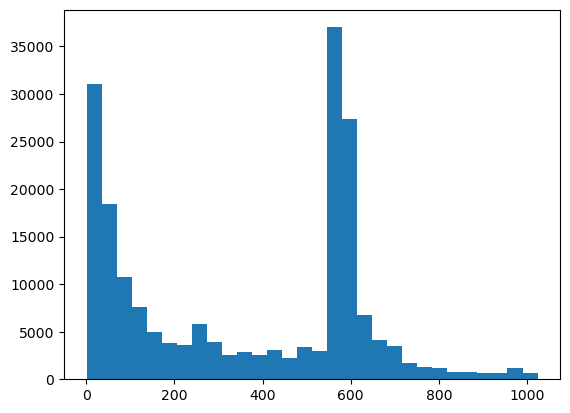

In [119]:
plt.hist(lens , bins = 30)

(array([1.6740e+03, 1.5777e+04, 4.6228e+04, 5.2896e+04, 3.5895e+04,
        1.8562e+04, 8.6800e+03, 4.5170e+03, 4.4770e+03, 3.0220e+03,
        2.3660e+03, 1.6430e+03, 5.0700e+02, 4.0800e+02, 1.2400e+02,
        1.5400e+02, 2.0000e+01, 7.1000e+01, 5.5000e+01, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 1.0800e+02, 3.0000e+00]),
 array([  2.        ,  17.86666667,  33.73333333,  49.6       ,
         65.46666667,  81.33333333,  97.2       , 113.06666667,
        128.93333333, 144.8       , 160.66666667, 176.53333333,
        192.4       , 208.26666667, 224.13333333, 240.        ,
        255.86666667, 271.73333333, 287.6       , 303.46666667,
        319.33333333, 335.2       , 351.06666667, 366.93333333,
        382.8       , 398.66666667, 414.53333333, 430.4       ,
        446.26666667, 462.13333333, 478.        ]),
 <BarContainer object of 30 artists>)

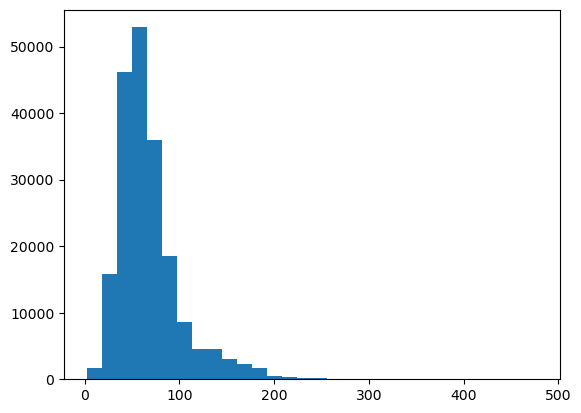

In [120]:
arr2 = list(map(str , df_train.name_rus.values))
lens2 = [len(i) for i in arr2]
plt.hist(lens2 , bins = 30)

In [121]:
categorical_columns = ['brand_name', 'CommercialTypeName4']


<b>Хочется убрать все бренды которые встречаются мало раз<b>


In [123]:
df_train[categorical_columns]

,brand_name,CommercialTypeName4
id,,
159385,ACTRUM,Пылесборник
288616,Red Line,Крышка для объектива
108090,Talwar Brothers,Аксессуар для музыкального инструмента
415607,NaN,Видеоигра
332391,NaN,Видеоигра
...,...,...
159865,Tefal,Паровая станция
299636,Dyson,Выпрямитель для волос Dyson
24145,Weissgauff,Посудомоечная машина компактная


In [124]:
df_train['CommercialTypeName4'].value_counts()

CommercialTypeName4
Дисплеи для телефонов                                               15002
Аккумулятор для мобильного телефона                                 11965
Корпуса для телефонов                                               11960
Запчасти для телевизора                                             10192
Картридж, чернила, тонер                                             8570
                                                                    ...  
Оригинальное зарядное устройство для игровой приставки, геймпада        1
Встраиваемая стиральная машина                                          1
Аксессуары для пивоварения                                              1
Водонепроницаемый чехол для смартфона                                   1
Посудомоечная машина компактная                                         1
Name: count, Length: 634, dtype: int64

(array([569.,  26.,   8.,  11.,   6.,   0.,   4.,   1.,   1.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000000e+00, 5.01033333e+02, 1.00106667e+03, 1.50110000e+03,
        2.00113333e+03, 2.50116667e+03, 3.00120000e+03, 3.50123333e+03,
        4.00126667e+03, 4.50130000e+03, 5.00133333e+03, 5.50136667e+03,
        6.00140000e+03, 6.50143333e+03, 7.00146667e+03, 7.50150000e+03,
        8.00153333e+03, 8.50156667e+03, 9.00160000e+03, 9.50163333e+03,
        1.00016667e+04, 1.05017000e+04, 1.10017333e+04, 1.15017667e+04,
        1.20018000e+04, 1.25018333e+04, 1.30018667e+04, 1.35019000e+04,
        1.40019333e+04, 1.45019667e+04, 1.50020000e+04]),
 <BarContainer object of 30 artists>)

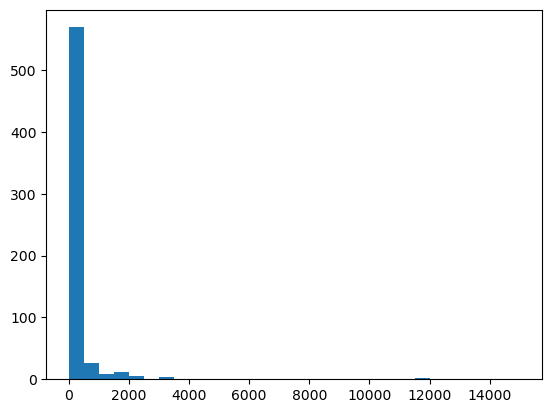

In [125]:
plt.hist(df_train['CommercialTypeName4'].value_counts().values, bins = 30)

In [126]:
df_train['brand_name'].value_counts()

brand_name
iQZiP            6084
ProFDetali       4811
OEM              4275
Sony             3053
Levsha kaluga    3009
                 ... 
Pioneer Woman       1
4CarMedia           1
Trion Worlds        1
AlexAndAlice        1
LANGTU              1
Name: count, Length: 4066, dtype: int64

(array([3.963e+03, 5.200e+01, 2.300e+01, 7.000e+00, 4.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 2.03766667e+02, 4.06533333e+02, 6.09300000e+02,
        8.12066667e+02, 1.01483333e+03, 1.21760000e+03, 1.42036667e+03,
        1.62313333e+03, 1.82590000e+03, 2.02866667e+03, 2.23143333e+03,
        2.43420000e+03, 2.63696667e+03, 2.83973333e+03, 3.04250000e+03,
        3.24526667e+03, 3.44803333e+03, 3.65080000e+03, 3.85356667e+03,
        4.05633333e+03, 4.25910000e+03, 4.46186667e+03, 4.66463333e+03,
        4.86740000e+03, 5.07016667e+03, 5.27293333e+03, 5.47570000e+03,
        5.67846667e+03, 5.88123333e+03, 6.08400000e+03]),
 <BarContainer object of 30 artists>)

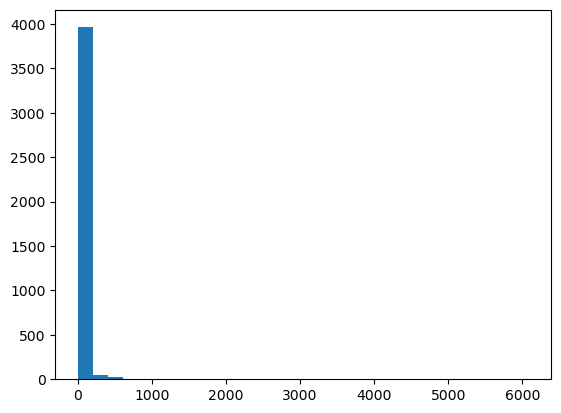

In [127]:
plt.hist(df_train['brand_name'].value_counts().values, bins = 30)

In [128]:
X_train = df_train[numeric_columns].fillna(0)
y_train = df_train['resolution']
X_test = df_test[numeric_columns].fillna(0)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print()


X_train shape: (197198, 39)
X_test shape: (22760, 39)



### 3. Обучение модели

In [39]:

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

val_pred = model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, val_pred)

print(f"Validation accuracy: {val_accuracy:.4f}")
print("Classification report:")
print(classification_report(y_val_split, val_pred))
print()


Validation accuracy: 0.9651
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     36830
           1       0.88      0.54      0.67      2610

    accuracy                           0.97     39440
   macro avg       0.93      0.77      0.83     39440
weighted avg       0.96      0.97      0.96     39440




### 4. Формирование submission.csv

In [40]:

test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    'id': df_test.index,
    'prediction': test_predictions
})

submission.to_csv('submission.csv', index=False)


print(f"Создан файл submission.csv с {len(submission)} предсказаниями")
print(f"Распределение предсказаний:")
print(submission['prediction'].value_counts())
print()

Создан файл submission.csv с 22760 предсказаниями
Распределение предсказаний:
prediction
0    22465
1      295
Name: count, dtype: int64



In [151]:
df = df_train[df_train["resolution"] == 1]

In [51]:
df_fake = df[text_columns]

In [57]:
brand = df_fake.brand_name

In [61]:
df_fake["brand_anme"]

brand_name
Sony                600
Mivis               436
Logitech G          299
Pioneer             167
Philips Sonicare    131
                   ... 
Ipega                 1
SwiftHarmony          1
RECCI                 1
VIXION                1
Sven                  1
Name: count, Length: 686, dtype: int64

In [69]:
data = df_fake.description.values

In [81]:
df_test.head()

,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,comments_published_count,...,ExemplarReturnedCountTotal30,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID
id,,,,,,,,,,,,,,,,,,,,,
17384,NaN,Приветствую! Мы собираем классные системные бл...,"LeBefane Системный блок (AMD Ryzen 5 7500F, RA...",Настольный компьютер,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,0.000000,658.085303,768.020850,1.0,1.0,1010.0,8777,398
260316,Canon,<li>Тип товара Новый</li><li><b>Тип</b> Картри...,Картридж лазерный Canon 071H 5646C002 черный (...,"Картридж, чернила, тонер",NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,277.0,1046.284281,1259.789504,1386.227650,425.0,425.0,997.0,127929,576
10610,Devia,Электронное перо Touch S-Pen для Samsung Galax...,Стилус для Samsung Galaxy Z Fold5 5G/ SM-F946B...,Стилус,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,244.0,934.117581,1111.416588,1201.633994,9.0,9.0,812.0,5341,1946
205236,GALAXY LINE,Мультиварка GALAXY GL2643 имеет все необходимы...,"Мультиварка GALAXY GL2643 ( 900 Вт, 10 програм...","Мультиварка, скороварка",NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,61.0,1067.935416,1267.434380,1322.794836,8.0,8.0,785.0,100481,697
308655,MAUNFELD,Чайники с ретро-термометром позволяет нагреть ...,Чайник электрический MAUNFELD MGK-625MINT. Тов...,Чайник электрический,NaN,NaN,NaN,NaN,NaN,NaN,...,557.0,1476.0,1405.752984,1553.905780,1643.785320,57.0,57.0,1767.0,151937,1575


(array([2.801e+03, 4.260e+02, 2.380e+02, 1.300e+02, 1.380e+02, 1.240e+02,
        1.420e+02, 1.790e+02, 1.670e+02, 8.400e+01, 1.170e+02, 1.440e+02,
        1.220e+02, 9.400e+01, 1.420e+02, 1.630e+02, 3.751e+03, 3.155e+03,
        5.350e+02, 2.050e+02, 1.290e+02, 2.100e+01, 1.400e+01, 1.300e+01,
        2.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 5.000e+00]),
 array([1.00000000e+00, 3.48333333e+01, 6.86666667e+01, 1.02500000e+02,
        1.36333333e+02, 1.70166667e+02, 2.04000000e+02, 2.37833333e+02,
        2.71666667e+02, 3.05500000e+02, 3.39333333e+02, 3.73166667e+02,
        4.07000000e+02, 4.40833333e+02, 4.74666667e+02, 5.08500000e+02,
        5.42333333e+02, 5.76166667e+02, 6.10000000e+02, 6.43833333e+02,
        6.77666667e+02, 7.11500000e+02, 7.45333333e+02, 7.79166667e+02,
        8.13000000e+02, 8.46833333e+02, 8.80666667e+02, 9.14500000e+02,
        9.48333333e+02, 9.82166667e+02, 1.01600000e+03]),
 <BarContainer object of 30 artists>)

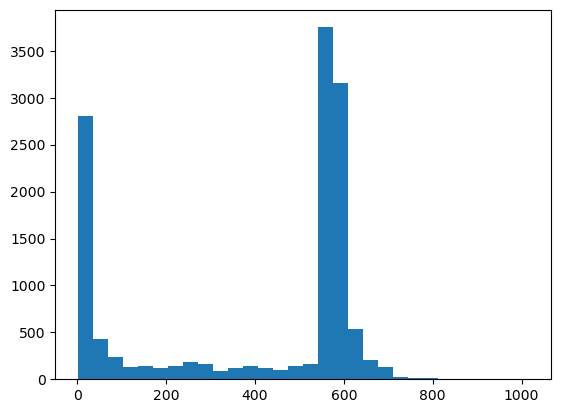

In [83]:
arr3 = list(map(str , df_fake.description.values))
lens3 = [len(i) for i in arr3]
plt.hist(lens3 , bins = 30)

(array([28212., 18021., 10479.,  7466.,  4794.,  3721.,  3442.,  5691.,
         3748.,  2524.,  2745.,  2451.,  2935.,  2199.,  3242.,  2839.,
        32539., 24856.,  6320.,  3874.,  3403.,  1719.,  1233.,  1133.,
          766.,   721.,   617.,   709.,  1142.,   605.]),
 array([1.000e+00, 3.510e+01, 6.920e+01, 1.033e+02, 1.374e+02, 1.715e+02,
        2.056e+02, 2.397e+02, 2.738e+02, 3.079e+02, 3.420e+02, 3.761e+02,
        4.102e+02, 4.443e+02, 4.784e+02, 5.125e+02, 5.466e+02, 5.807e+02,
        6.148e+02, 6.489e+02, 6.830e+02, 7.171e+02, 7.512e+02, 7.853e+02,
        8.194e+02, 8.535e+02, 8.876e+02, 9.217e+02, 9.558e+02, 9.899e+02,
        1.024e+03]),
 <BarContainer object of 30 artists>)

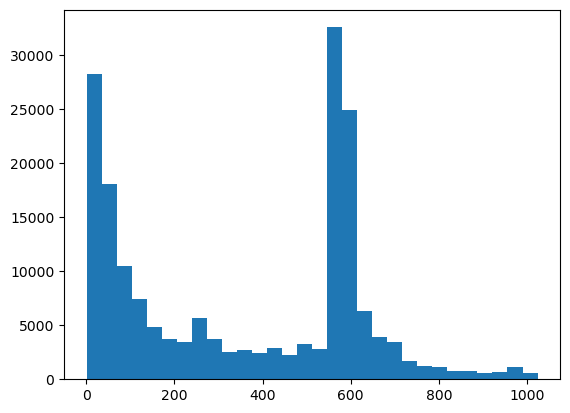

In [91]:
arr4 = list(map(str , df_True.description.values))
lens4 = [len(i) for i in arr4]
plt.hist(lens4 , bins = 30)

In [95]:
df_test.head()

,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,comments_published_count,...,ExemplarReturnedCountTotal30,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID
id,,,,,,,,,,,,,,,,,,,,,
17384,NaN,Приветствую! Мы собираем классные системные бл...,"LeBefane Системный блок (AMD Ryzen 5 7500F, RA...",Настольный компьютер,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,0.000000,658.085303,768.020850,1.0,1.0,1010.0,8777,398
260316,Canon,<li>Тип товара Новый</li><li><b>Тип</b> Картри...,Картридж лазерный Canon 071H 5646C002 черный (...,"Картридж, чернила, тонер",NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,277.0,1046.284281,1259.789504,1386.227650,425.0,425.0,997.0,127929,576
10610,Devia,Электронное перо Touch S-Pen для Samsung Galax...,Стилус для Samsung Galaxy Z Fold5 5G/ SM-F946B...,Стилус,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,244.0,934.117581,1111.416588,1201.633994,9.0,9.0,812.0,5341,1946
205236,GALAXY LINE,Мультиварка GALAXY GL2643 имеет все необходимы...,"Мультиварка GALAXY GL2643 ( 900 Вт, 10 програм...","Мультиварка, скороварка",NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,61.0,1067.935416,1267.434380,1322.794836,8.0,8.0,785.0,100481,697
308655,MAUNFELD,Чайники с ретро-термометром позволяет нагреть ...,Чайник электрический MAUNFELD MGK-625MINT. Тов...,Чайник электрический,NaN,NaN,NaN,NaN,NaN,NaN,...,557.0,1476.0,1405.752984,1553.905780,1643.785320,57.0,57.0,1767.0,151937,1575


In [187]:
data = df_test[df_test['ItemID'] == 778 ]

In [189]:
data

,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,comments_published_count,...,ExemplarReturnedCountTotal30,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID
id,,,,,,,,,,,,,,,,,,,,,
1450,FixZip,Втулка-подшипник для вала двигателя редуктора ...,Втулка-подшипник для кофемашины Philips,"Запчасти для кофемашины, кофеварки",NaN,NaN,NaN,NaN,NaN,NaN,...,231.0,768.0,1175.144678,1335.739361,1459.345969,76.0,76.0,497.0,778,486


In [29]:
row = df_test.loc[df_test['ItemID'] == 778]

In [33]:
row["PriceDiscounted"]

id
1450    641.536379
Name: PriceDiscounted, dtype: float64

In [197]:
print(row.to_string())

     brand_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 description                                 name_rus                 Com

(array([1.0000e+00, 1.5000e+01, 3.0000e+00, 3.0000e+01, 1.0470e+03,
        6.1000e+01, 1.3300e+02, 4.3400e+02, 2.8980e+03, 1.9715e+04,
        3.3343e+04, 3.3712e+04, 3.8517e+04, 2.6039e+04, 1.4148e+04,
        8.1450e+03, 5.3740e+03, 3.7670e+03, 2.9740e+03, 3.5140e+03,
        2.4960e+03, 7.3500e+02, 4.8000e+01, 1.2000e+01, 5.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 2.6000e+01, 3.0000e+00]),
 array([   0.        ,   60.5521031 ,  121.10420621,  181.65630931,
         242.20841241,  302.76051551,  363.31261862,  423.86472172,
         484.41682482,  544.96892793,  605.52103103,  666.07313413,
         726.62523723,  787.17734034,  847.72944344,  908.28154654,
         968.83364965, 1029.38575275, 1089.93785585, 1150.48995896,
        1211.04206206, 1271.59416516, 1332.14626826, 1392.69837137,
        1453.25047447, 1513.80257757, 1574.35468068, 1634.90678378,
        1695.45888688, 1756.01098998, 1816.56309309]),
 <BarContainer object of 30 artists>)

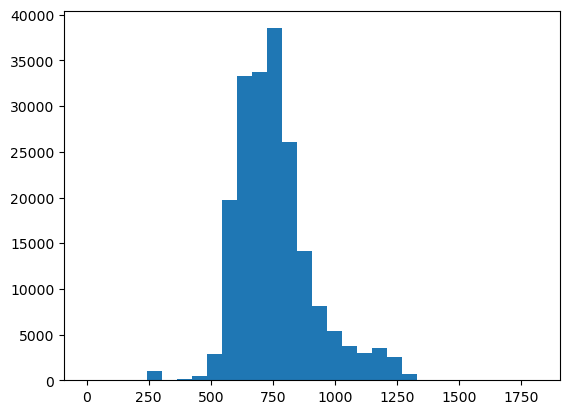

In [25]:
import matplotlib.pyplot as plt
plt.hist(df_train["PriceDiscounted"].values, bins =30)